In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
# Import the data
file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [3]:
# Remove the "MYOPIC" column from the dataset.
target_df = df.drop('MYOPIC', axis=1)


In [4]:
#Standardizing the data
myopia_scaled = StandardScaler().fit_transform(target_df)

In [5]:
# Initialize PCA model
pca = PCA(n_components=0.90)

# Reduce features
myopia_pca = pca.fit_transform(target_df)
myopia_pca

array([[ 12.13805926,  31.63621189,  -4.52662538],
       [-15.26836285,  -6.09569473,   1.2070745 ],
       [-11.66223916,   3.75510503,   2.80821178],
       ...,
       [-23.15630411,  -1.33725918,  -1.15176635],
       [ -2.26448079,   1.09638499,   6.45876893],
       [-10.35437728,  14.58755696,   1.55768903]])

In [6]:
#Create df & examine shape for feature reduction
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)

df_myopia_pca

,principal component 1,principal component 2,principal component 3
0,12.138059,31.636212,-4.526625
1,-15.268363,-6.095695,1.207074
2,-11.662239,3.755105,2.808212
3,11.235886,4.012566,-8.179565
4,-22.446506,4.580916,-1.817501
...,...,...,...
613,10.414160,-10.950135,5.155179
614,-16.878251,-3.756665,2.251089
615,-23.156304,-1.337259,-1.151766
616,-2.264481,1.096385,6.458769


In [7]:
#Create new df for t-SNE
df_myopia_tsne = df_myopia_pca

In [8]:
#Initiate t-SNE model
tsne = TSNE(learning_rate=35)

In [9]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_tsne)

/Users/greg/opt/anaconda3/envs/PythonDataOne/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [10]:
# check the shape
tsne_features.shape

(618, 2)

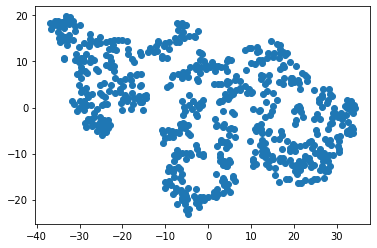

In [12]:
# Prepare to plot the dataset

# The first column of transformed features
df_myopia_tsne['x'] = tsne_features[:,0]

# The second column of transformed features
df_myopia_tsne['y'] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(df_myopia_tsne['x'], df_myopia_tsne['y'])
plt.show()

In [13]:
# Initializing model with K = 3
model = KMeans(n_clusters=3, random_state=5)

In [14]:
# Fitting model
model.fit(df_myopia_tsne)

KMeans(n_clusters=3, random_state=5)

In [15]:
# Get predictions
predictions = model.predict(df_myopia_tsne)
print(predictions)

[2 1 1 0 1 0 0 1 1 2 0 1 1 1 2 1 2 2 2 2 0 1 1 0 2 2 1 2 1 1 2 0 2 2 2 0 0
 2 1 2 1 1 0 2 2 1 0 1 2 0 1 1 1 1 1 0 2 1 1 2 2 2 0 1 0 0 1 1 2 1 0 1 0 0
 1 2 1 0 0 2 1 2 1 2 1 1 0 0 1 2 1 1 2 2 1 0 2 1 2 2 0 1 0 2 0 0 1 2 2 2 0
 1 1 2 1 1 2 1 2 2 2 2 1 2 0 0 2 1 1 1 2 2 0 2 2 1 1 1 2 0 2 2 1 1 1 2 2 2
 1 0 2 2 0 1 2 1 1 2 1 2 2 1 2 1 2 2 0 2 0 1 1 2 0 2 1 2 1 1 0 1 2 0 2 2 1
 0 1 1 1 2 2 2 2 2 2 0 1 2 1 0 1 1 2 2 2 1 0 2 1 0 0 2 2 2 2 2 0 1 1 0 1 2
 0 1 1 0 0 2 2 1 0 0 2 0 1 1 2 0 1 2 2 0 1 2 1 2 2 1 0 2 2 2 1 0 1 2 1 1 2
 1 2 1 1 1 1 1 2 1 1 1 1 1 2 0 1 1 2 1 0 2 1 0 2 0 2 1 2 0 2 2 1 1 0 1 0 1
 1 1 0 2 1 2 0 2 2 2 0 1 2 2 0 1 2 1 1 2 2 2 2 0 0 0 2 0 2 2 1 2 1 2 2 1 1
 2 1 2 1 1 0 2 2 2 1 2 1 2 1 2 0 2 1 1 2 2 1 2 1 1 0 2 1 1 2 2 2 1 2 0 2 2
 2 2 1 2 0 2 2 0 2 2 0 1 2 1 2 0 1 0 2 0 1 0 1 1 2 2 2 2 1 2 2 1 0 0 0 0 0
 0 0 0 2 2 2 0 2 2 1 1 1 1 0 0 1 1 0 2 1 0 2 2 0 2 1 2 1 2 2 0 2 0 1 1 2 2
 2 1 1 2 1 0 0 0 2 2 2 2 0 1 2 2 2 1 2 2 0 2 2 0 2 0 1 0 1 1 0 1 1 1 1 2 2
 1 2 0 2 2 2 0 1 0 0 1 1 

In [16]:
# Add a new class column to df_iris
df_myopia_tsne["class"] = model.labels_
df_myopia_tsne.head()

,principal component 1,principal component 2,principal component 3,x,y,class
0,12.138059,31.636212,-4.526625,-7.354384,18.302168,2
1,-15.268363,-6.095695,1.207074,27.945345,-7.720707,1
2,-11.662239,3.755105,2.808212,11.828502,-0.743483,1
3,11.235886,4.012566,-8.179565,-13.531606,12.945106,0
4,-22.446506,4.580916,-1.817501,23.102650,6.694853,1


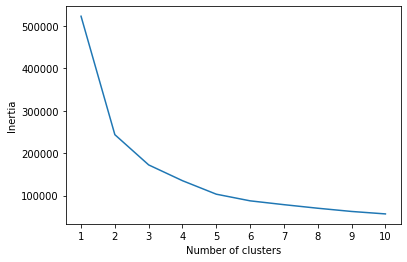

In [17]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_tsne)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

I would say patients can be clustered at around the 3 mark as that is where inertia begins to reduce drastically. This is supported by the t-SNE plot, which show three closely clustered but relatively distinct groupings visually.  